In [1]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
import math

def nev(r):
    return 255 - r 

def contrast(r):
    r_nor = np.array(r) / 255.0 
    k = 0.5
    result = 255 / (1 + np.exp(k - r_nor))
    return result.astype(np.uint8)
       
def threshold(r, k):
    result = np.zeros_like(r, dtype=np.uint8)  
    
    result[r >= k] = 255 
    result[r < k] = 0    
    
    return result

def logarit(r, c):
    return c*np.log(1+r)    
    
    


In [84]:
print(sigmoid(cat))
print(cat)


[[160 159 158 ... 162 162 162]
 [160 159 159 ... 162 162 162]
 [160 159 159 ... 162 162 162]
 ...
 [147 147 147 ... 155 155 155]
 [147 147 147 ... 155 155 155]
 [147 147 148 ... 155 155 155]]
[[149 143 142 ... 159 159 159]
 [151 144 143 ... 159 159 159]
 [152 146 145 ... 159 159 159]
 ...
 [ 89  89  91 ... 128 128 128]
 [ 89  90  91 ... 128 128 128]
 [ 90  90  92 ... 128 128 128]]


In [3]:
cat = cv2.imread("./images/cat.jpg", cv2.IMREAD_GRAYSCALE)
girl = cv2.imread("./images/girl-gray.png", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=[7,7])
# plt.imshow(girl, cmap="gray")
# cv2.imwrite("./images/cat-gray.jpg", cat)

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

Text(0.5, 1.0, 'Log')

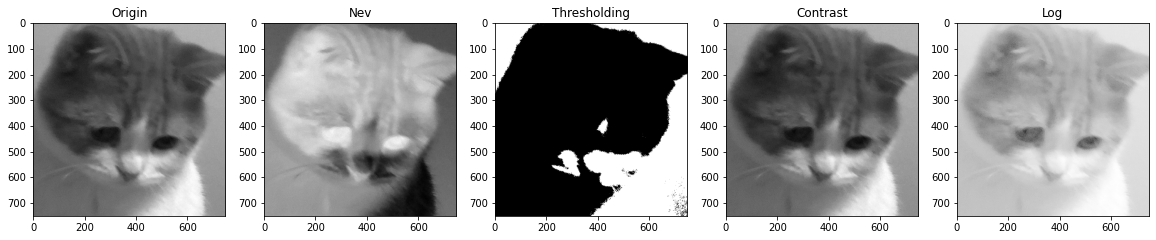

In [87]:
plt.figure(figsize=[20,20])

plt.subplot(151); plt.imshow(cat,cmap="gray"); plt.title("Origin")
plt.subplot(152); plt.imshow(nev(cat), cmap="gray"); plt.title("Nev")
plt.subplot(153); plt.imshow(threshold(cat, 128), cmap="gray"); plt.title("Thresholding")
plt.subplot(154); plt.imshow(contrast(cat), cmap="gray"); plt.title("Contrast")
plt.subplot(155); plt.imshow(logarit(cat,1), cmap="gray"); plt.title("Log")

# 1. Image Thresholding

## 1.1 Simple Thresholding

Document:  https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html

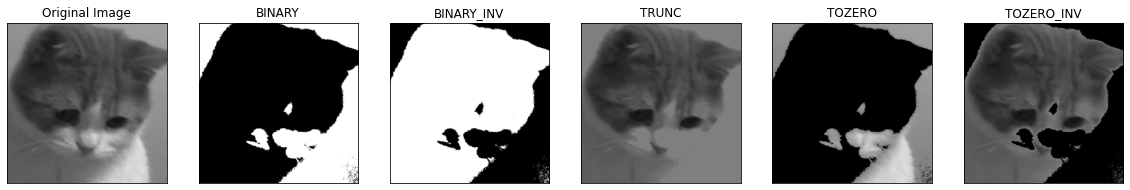

In [93]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=[20,20])
img = cv.imread('./images/cat.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(1,6,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## 1.2 Adaptive Thresholding

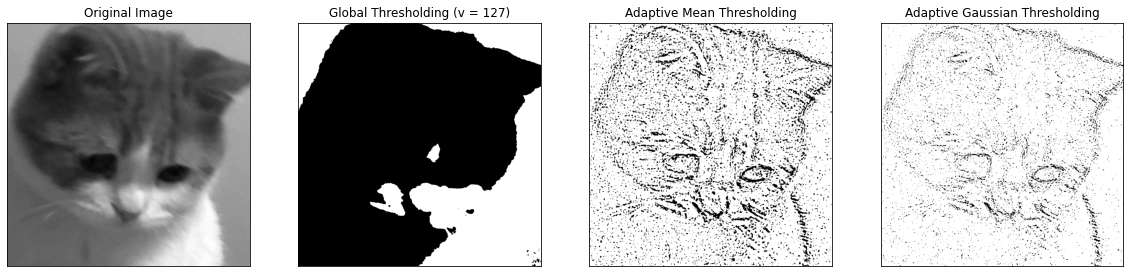

In [95]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('./images/cat.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
plt.figure(figsize=[20,20])
for i in range(4):
    plt.subplot(1,4,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# 2. Image Addition

In [98]:
img1 = cv.imread('./images/cat.jpg')
img2 = cv.imread('./images/cat_gray.jpg')
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"
dst = cv.addWeighted(img1,0.7,img2,0.3,0)
cv.imshow('dst',dst)
cv.waitKey(0)
cv.destroyAllWindows()


In [99]:
# Load two images
img1 = cv.imread('./images/cat.jpg')
img2 = cv.imread('./images/girl-gray.png')
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]
# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)
# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv.imshow('res',img1)
cv.waitKey(0)
cv.destroyAllWindows()

# 3. Histogram

In [43]:
def ve_bieu_do_histogram(matran):
    flattened_matran = matran.flatten()
    unique_values, counts = np.unique(flattened_matran, return_counts=True)
    value_count = {}
    for i in range(256):
        if i not in unique_values:
            value_count[i] = 0
        else: 
            value_count[i] = counts[unique_values == i][0]
    plt.bar(unique_values, counts, align='center')
    plt.xlabel('Giá trị')
    plt.ylabel('Tần suất')
    plt.title('Biểu đồ histogram của ma trận')
    plt.show()
    
    print(value_count)
    print(unique_values)

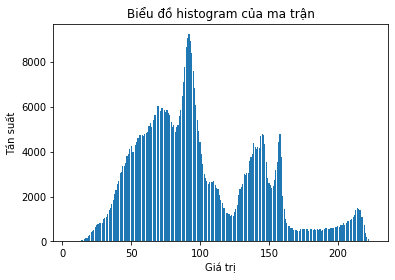

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 4, 8: 4, 9: 6, 10: 7, 11: 21, 12: 21, 13: 32, 14: 43, 15: 77, 16: 94, 17: 137, 18: 168, 19: 232, 20: 294, 21: 408, 22: 466, 23: 515, 24: 652, 25: 736, 26: 784, 27: 828, 28: 829, 29: 834, 30: 1011, 31: 1048, 32: 1108, 33: 1227, 34: 1413, 35: 1489, 36: 1645, 37: 1847, 38: 2124, 39: 2294, 40: 2557, 41: 2691, 42: 3058, 43: 3070, 44: 3343, 45: 3375, 46: 3473, 47: 3813, 48: 3891, 49: 4132, 50: 4233, 51: 3965, 52: 3993, 53: 4280, 54: 4444, 55: 4592, 56: 4741, 57: 4758, 58: 4740, 59: 4677, 60: 4798, 61: 4820, 62: 4876, 63: 5147, 64: 5264, 65: 5110, 66: 5400, 67: 5628, 68: 5624, 69: 6016, 70: 6029, 71: 5808, 72: 5962, 73: 5929, 74: 5848, 75: 5747, 76: 5847, 77: 5740, 78: 5615, 79: 5333, 80: 5108, 81: 5168, 82: 4881, 83: 5100, 84: 5187, 85: 5578, 86: 5868, 87: 6489, 88: 7083, 89: 7783, 90: 8655, 91: 9041, 92: 9226, 93: 8910, 94: 8394, 95: 7577, 96: 6853, 97: 6095, 98: 5392, 99: 4921, 100: 4439, 101: 3886, 102: 3442, 103: 2987, 104: 2826, 105: 2701, 1

In [44]:
ve_bieu_do_histogram(cat)

In [38]:
a = {1: 2, 4:2}
a[1]

2

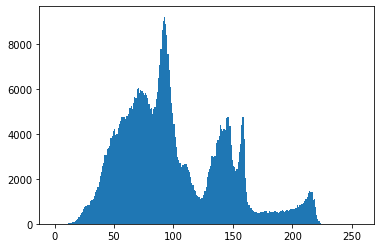

In [9]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('./images/cat.jpg', cv.IMREAD_GRAYSCALE)
plt.hist(img.ravel(),256,[0,256]); plt.show()

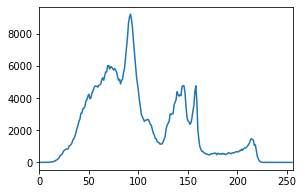

In [21]:
img = cv.imread('./images/cat.jpg', cv.IMREAD_GRAYSCALE)

hist_full = cv.calcHist([img],[0],None,[256],[0,256])
plt.figure(figsize=[10,3])
# plt.subplot(121), plt.imshow(img, 'gray')
plt.subplot(121), plt.plot(hist_full)
plt.xlim([0,256])
plt.show()